# Convolutional Neural Network for classification of CIFAR 10

## Import Modules

some notes taken from [here](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/)

In [9]:
import numpy as np
np.random.seed(0)

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, SpatialDropout2D
from keras.layers import Flatten, Dense, Dropout, Activation

from keras.callbacks import CSVLogger

from keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical

from keras.optimizers import Adagrad, SGD, Adam

## Load Data

In [2]:
from keras.datasets import cifar10

## Preprocess Data

[here](https://keras.io/api/preprocessing/image/#imagedatagenerator-class) you can look into ImageDataGenerator class as a way to generate more data for the model to train on

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255
X_test /= 255


Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

## Define Model Architecture

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.25))
model.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.25))
model.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(10, activation='softmax'))

## Compile Model

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(epsilon=0.1) , # SGD(learning_rate=0.001, momentum=0.9),
              metrics=['accuracy'])

## Fit Model

[Here](https://medium.com/singlestone/keras-callbacks-monitor-and-improve-your-deep-learning-205a8a27e91c) you can find data on Keras Call Backs

In [12]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
                    callbacks = CSVLogger('Training.log'),
                    epochs=150, verbose=1,
                    validation_data = (X_test, Y_test))

Epoch 1/150
1563/1563 [==============================] - 18s 12ms/step - loss: 2.3000 - accuracy: 0.1077 - val_loss: 2.2846 - val_accuracy: 0.1810
Epoch 2/150
1563/1563 [==============================] - 18s 11ms/step - loss: 2.2537 - accuracy: 0.1509 - val_loss: 2.1684 - val_accuracy: 0.2262
Epoch 3/150
1563/1563 [==============================] - 18s 11ms/step - loss: 2.1959 - accuracy: 0.1720 - val_loss: 2.0860 - val_accuracy: 0.2530
Epoch 4/150
1563/1563 [==============================] - 18s 11ms/step - loss: 2.1461 - accuracy: 0.1865 - val_loss: 1.9961 - val_accuracy: 0.2524
Epoch 5/150
1563/1563 [==============================] - 18s 11ms/step - loss: 2.0979 - accuracy: 0.2026 - val_loss: 1.9161 - val_accuracy: 0.2896
Epoch 6/150
1563/1563 [==============================] - 18s 12ms/step - loss: 2.0458 - accuracy: 0.2208 - val_loss: 1.8539 - val_accuracy: 0.3201
Epoch 7/150
1563/1563 [==============================] - 18s 12ms/step - loss: 2.0091 - accuracy: 0.2289 - val_loss: 1

## Evaluate Model

[Here] is some information on simple pandas dataframe manipulation and [here](https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html) is information on plotting said information

Loss: 0.7705232501029968
Accuracy: 0.7275000214576721



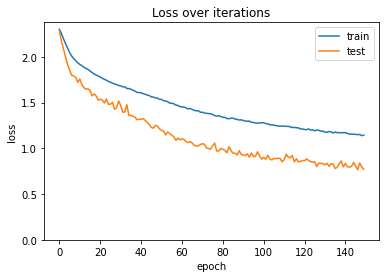

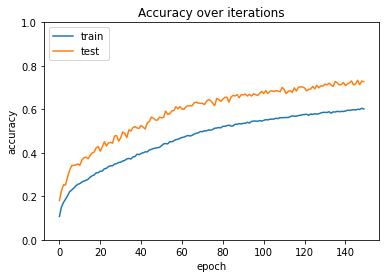

In [13]:
from pandas import read_csv
import matplotlib.pyplot as plt

score = model.evaluate(X_test, Y_test, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]))
print()

plt.figure()
plt.title('Loss over iterations')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(list(range(len(history.history['loss']))), history.history['loss'])
plt.plot(list(range(len(history.history['val_loss']))), history.history['val_loss'])
plt.ylim(bottom=0)
plt.legend(['train', 'test'], loc='upper right')

plt.figure()
plt.title('Accuracy over iterations')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(bottom=0, top=1)
plt.plot(list(range(len(history.history['accuracy']))), history.history['accuracy'])
plt.plot(list(range(len(history.history['val_accuracy']))), history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')